# Wrangle

We will start with mall_customers database.

- acquire: verify our acquire module is working
- summarize our data
- plot histograms & boxplots
- na's
- outliers
- astype()
- pd.cut()

# Acquire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare
from acquire import get_mall_data
from acquire import get_telco_data

In [2]:
df = acquire.get_mall_data()

## Summarize

In [3]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Takeaways**
1. Not sure how annual income is computed, or what units it is in.
2. I don't know what spend score means, I'm assuming higher spending score means more likely to spend, better to market to?

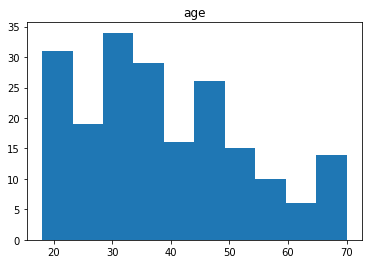

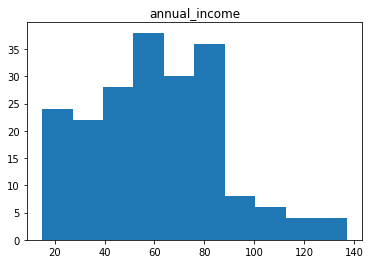

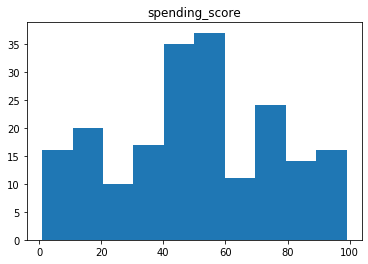

In [5]:
for col in ['age','annual_income','spending_score']:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

#Workflow
notebook -> python script
data flow: acquire -> exploration
What are the benefits of a py script over a notebook?
    -We can import functions from py scripts -- data pipeline reproducable & resusable
    -Better project organization
What are some downsides of py files?
    -feedback loop is longer
    -if you're working by yourself this could provide minimal benefit
    -duplicated work between wrangle notebooks an scripts
    

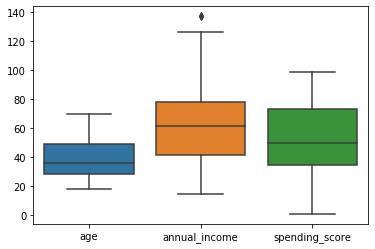

In [6]:
sns.boxplot(data=df[['age', 'annual_income','spending_score']])

nulls, outliers, cut, dropna, fillna, get_dummies (think about if any new features to compute) train, validate, test split 
update prepare.py file to necessary changes

In [7]:
df.isna().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

 Takeaway: no nulls in our data set

**Cutting / Binning** lets us turn a continous variable into a categorical one.
    -`pd.cut` creates bins of equal width
    -`pd.qcut` creates bins with the same number of observations in each
    
   In both cases the range is determined from the data.
   This can be helpful for initial exploration, interpretation, and visualization

In [8]:
pd.cut(df.age, bins=4).value_counts()

(17.948, 31.0]    70
(31.0, 44.0]      61
(44.0, 57.0]      43
(57.0, 70.0]      26
Name: age, dtype: int64

In [9]:
pd.qcut(df.age, 4).value_counts().sort_index()

(17.999, 28.75]    50
(28.75, 36.0]      54
(36.0, 49.0]       51
(49.0, 70.0]       45
Name: age, dtype: int64

In [10]:
pd.cut(df.age, bins=[0,30,50,100]).value_counts()

(30, 50]     98
(0, 30]      62
(50, 100]    40
Name: age, dtype: int64

In [11]:
df.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

In [12]:
df['is_female'] = (df.gender == 'Female').astype('int')

In [13]:
df.head()

,customer_id,gender,age,annual_income,spending_score,is_female
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_and_validate, test = train_test_split(df, test_size=.15, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.15, random_state=123)

print('train', train.shape)
print('test', test.shape)
print('validate', validate.shape)

train (144, 6)
test (30, 6)
validate (26, 6)


In [16]:
df = acquire.get_mall_data()

def prep_mall_data(df):
    df['is_female'] = (df.gender == 'Female').astype('int')
    train_and_validate, test = train_test_split(df, test_size=.15, random_state=123)
    train, validate = train_test_split(train_and_validate, test_size=.15, random_state=123)
    return train, test, validate



In [17]:
df = prep_mall_data(df)

Acquire customer_id, monthly_charges, tenure, and total_charges from telco_churn database for all customers with a 2 year contract.

In [18]:
df = prepare.prep_telco()

In [19]:
df.head()

,senior_citizen,tenure,phone_service,paperless_billing,monthly_charges,churn,Month-to-month,One year,Two year,DSL,Fiber optic,None,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Female,Male
0,0,9,1,0,59.9,0,1,0,0,1,0,0,0,0,0,1,0,1
1,0,9,1,1,69.4,0,1,0,0,1,0,0,0,1,0,0,1,0
2,1,7,1,1,48.2,0,1,0,0,1,0,0,0,0,1,0,1,0
3,1,1,0,1,25.1,1,1,0,0,1,0,0,0,0,1,0,0,1
4,0,1,0,0,30.5,1,1,0,0,1,0,0,1,0,0,0,1,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   senior_citizen             7043 non-null   int64  
 1   tenure                     7043 non-null   int64  
 2   phone_service              7043 non-null   int64  
 3   paperless_billing          7043 non-null   int64  
 4   monthly_charges            7043 non-null   float64
 5   churn                      7043 non-null   int64  
 6   Month-to-month             7043 non-null   uint8  
 7   One year                   7043 non-null   uint8  
 8   Two year                   7043 non-null   uint8  
 9   DSL                        7043 non-null   uint8  
 10  Fiber optic                7043 non-null   uint8  
 11  None                       7043 non-null   uint8  
 12  Bank transfer (automatic)  7043 non-null   uint8  
 13  Credit card (automatic)    7043 non-null   uint8

In [22]:
charges = df[['monthly_charges','tenure','Two year']]

In [23]:
charges.head()

,monthly_charges,tenure,Two year
0,59.9,9,0
1,69.4,9,0
2,48.2,7,0
3,25.1,1,0
4,30.5,1,0


In [26]:
two_year = charges[charges['Two year'] == 1]

In [27]:
two_year.head()

,monthly_charges,tenure,Two year
1793,90.45,65,1
1794,45.20,54,1
1795,45.05,56,1
1796,39.40,20,1
1797,85.15,72,1


In [28]:
two_year.shape

(1695, 3)

In [30]:
two_year.isnull().sum()

monthly_charges    0
tenure             0
Two year           0
dtype: int64

In [31]:
two_year['total_charges'] = two_year['monthly_charges'] * two_year['tenure']

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
two_year.head()

,monthly_charges,tenure,Two year,total_charges
1793,90.45,65,1,5879.25
1794,45.20,54,1,2440.80
1795,45.05,56,1,2522.80
1796,39.40,20,1,788.00
1797,85.15,72,1,6130.80


In [33]:
def wrangle_telco():
    df = prepare.prep_telco()
    df = df[['monthly_charges','tenure','Two year']]
    df = df[df['Two year'] == 1]
    df['total_charges'] = df['monthly_charges'] * df['tenure']
    
    return df